# Chapter 3: Dimensionality Reduction with CUR and SVD

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.utils.extmath import randomized_svd
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset
https://raw.githubusercontent.com/palles77/DataPreprocessing/main/AP_Colon_Kidney.csv

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/palles77/DataPreprocessing/main/AP_Colon_Kidney.csv', index_col=0)
df.head(5)

,1007_s_at,121_at,1405_i_at,1438_at,1487_at,1494_f_at,1552256_a_at,1552257_a_at,1552274_at,1552275_s_at,...,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,Tissue
ID_REF,,,,,,,,,,,,,,,,,,,,,
203679,2883.2,2109.1,702.0,114.4,822.2,235.1,3346.1,815.1,233.3,218.4,...,2035.7,1908.1,30396.7,28371.7,85830.1,57084.9,3651.2,1736.1,2411.6,Kidney
179949,2607.4,1204.2,228.0,19.2,1497.1,167.6,23003.6,948.6,414.1,124.1,...,3811.6,3012.0,16748.8,13581.2,53322.5,37139.5,1648.1,502.9,890.6,Kidney
76558,2736.8,3912.2,1020.8,39.0,574.9,448.9,1337.9,605.6,176.8,411.9,...,17154.4,14835.5,64597.8,59311.2,203060.6,146422.6,3346.4,673.2,1499.3,Kidney
203712,1471.6,1318.2,4564.6,9.4,1426.5,105.2,2594.3,929.8,240.4,139.0,...,12382.2,11300.8,58551.7,49073.6,119460.8,95682.3,2553.5,961.2,1468.4,Kidney
102522,3564.7,2535.6,944.1,40.0,734.2,651.0,1490.5,712.3,632.7,185.0,...,13321.1,12966.9,54572.5,51049.1,178178.2,129533.2,3399.1,1209.8,1981.6,Kidney


#### Cleaning and Transforming Data

In [ ]:
X, y = df.drop('Tissue', axis=1), df['Tissue']
Xlog = np.log10(X + 1.0)
print(Xlog.shape)
Xlog.head(7)

(546, 10935)


,1007_s_at,121_at,1405_i_at,1438_at,1487_at,1494_f_at,1552256_a_at,1552257_a_at,1552274_at,1552275_s_at,...,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at
ID_REF,,,,,,,,,,,,,,,,,,,,,
203679,3.460025,3.324303,2.846955,2.062206,2.915505,2.373096,3.524669,2.911743,2.369772,2.341237,...,3.377907,3.308927,3.280829,4.482841,4.452901,4.933645,4.756529,3.562555,3.239825,3.382485
179949,3.416374,3.081059,2.359835,1.305351,3.175541,2.226858,4.361815,2.977541,2.618153,2.097257,...,3.088738,3.581221,3.478999,4.224010,4.132970,4.726919,4.569848,3.217247,2.702344,2.950170
76558,3.437402,3.592532,3.009366,1.602060,2.760347,2.653116,3.126748,2.782902,2.249932,2.615845,...,3.708863,4.234401,4.171331,4.810224,4.773144,5.307628,5.165611,3.524708,2.828789,3.176178
203712,3.168085,3.120311,3.659498,1.017033,3.154576,2.026125,3.414188,2.968856,2.382737,2.146128,...,3.660941,4.092833,4.053148,4.767547,4.690857,5.077229,4.980836,3.407306,2.983265,3.167140
102522,3.552145,3.404252,2.975478,1.612784,2.866405,2.814248,3.173623,2.853272,2.801884,2.269513,...,3.753422,4.124573,4.112870,4.736982,4.707997,5.250857,5.112384,3.531492,3.083072,3.297235
137948,3.480840,3.499371,2.378034,1.390935,2.642563,2.656386,3.114511,2.924383,2.214049,2.469822,...,3.645668,4.133111,4.119480,4.824241,4.773556,5.215252,5.099956,3.532882,3.141324,3.333326
152677,3.334594,3.369179,2.677972,1.547775,2.777064,2.364176,3.238096,2.902112,2.707911,2.449633,...,3.676245,4.136454,4.166566,4.764314,4.757914,5.206169,5.100804,2.129368,2.195069,1.968950


## Single Value Decomposition(SVD)

In [ ]:
Xlog_centered = Xlog - Xlog.mean(0)
U, Sigma, V = np.linalg.svd(Xlog_centered)

In [ ]:
(U.shape, Sigma.shape, V.shape)

((546, 546), (546,), (10935, 10935))

### Defining Function to perform SVD

In [ ]:
def perform_SVD(k, data):
    Xlog_centered = data - data.mean(0)
    U, Sigma, Vt = np.linalg.svd(Xlog_centered)
    X_svd = (U @ np.diag(Sigma))[:, :k]
    print(f"Decomposed Dataset Shape: {X_svd.shape}")
    reduced_df = pd.DataFrame(X_svd, columns=[f"Feature_{i}" for i in range(X_svd.shape[1])])
    print(reduced_df.head(7))
    fig, ax = plt.subplots(figsize=(8,6))

    #Calculating for reduction error
    U_k = U[:, :k]
    Sigma_k = np.diag(Sigma[:k])
    Vt_k = Vt[:k, :]
    A_k = U_k @ Sigma_k @ Vt_k
    error_svd = np.linalg.norm(Xlog_centered - A_k, 'fro')
    print(f'SVD Reduction Error: {error_svd}')

    sns.scatterplot(x=X_svd[:, 0], y=X_svd[:, 1], hue=y, ax=ax)
    plt.title('PCA (SVD) matrix low-dimensional representation', fontsize=14)
    plt.xlabel('First component', fontsize=14)
    plt.ylabel('Second component', fontsize=14)
    ax.legend()

    plt.show()

#### SVD into 2 columns

Decomposed Dataset Shape: (546, 2)
   Feature_0  Feature_1
0 -26.214115  -2.837069
1 -10.115635  -1.812037
2 -22.333239   0.567974
3 -19.474052   4.008687
4 -18.578161   4.606785
5 -23.081575   1.994824
6 -21.344206   5.297446
SVD Reduction Error: 644.7516209899338


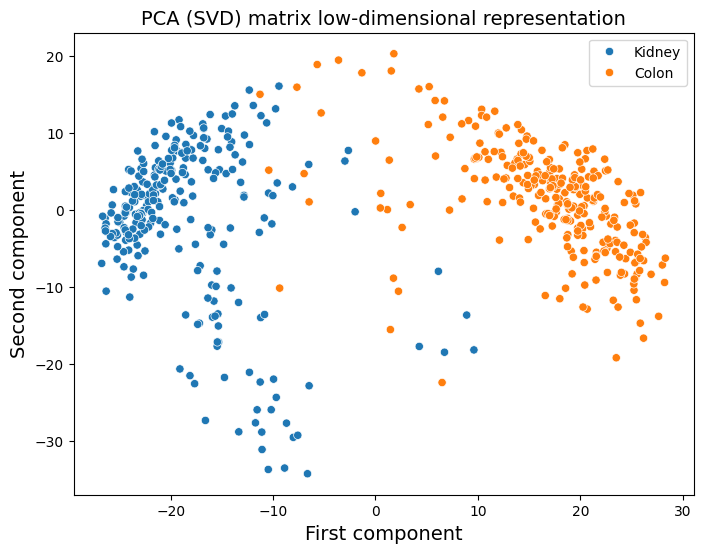

In [ ]:
perform_SVD(2, Xlog)

#### SVD into 5 columns

Decomposed Dataset Shape: (546, 5)
   Feature_0  Feature_1  Feature_2  Feature_3  Feature_4
0 -26.214115  -2.837069   8.853289  -0.410454   0.054630
1 -10.115635  -1.812037   7.685376  11.862206 -14.014934
2 -22.333239   0.567974   4.127169  -9.037603  -3.862649
3 -19.474052   4.008687   5.991324   8.174998  -4.843831
4 -18.578161   4.606785  -0.483321  -8.295036  -4.492302
5 -23.081575   1.994824   0.431555  -6.050662   5.035703
6 -21.344206   5.297446  -3.558699  -5.913898   0.664236
SVD Reduction Error: 581.3339702288627


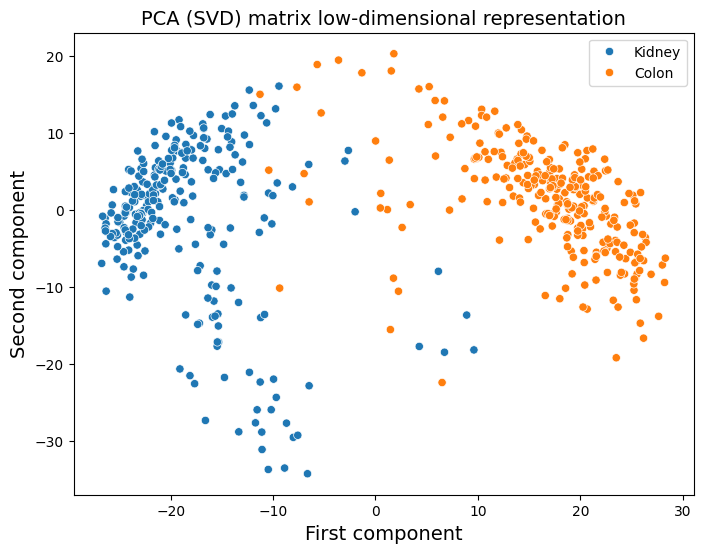

In [ ]:
perform_SVD(5, Xlog)

## CUR Dimensionality Reduction

### Defining Stochastic CUR Class

In [ ]:
#%%writefile CUR.py
import numpy as np
import pandas as pd
from sklearn.utils.extmath import randomized_svd

class CUR():
    def __init__(self, k, eps, it=None, truncated=False):
        self.k = k
        self.eps = eps
        self.trunc = truncated
        self.c = k * np.log(k) / eps**2
        self.C, self.U, self.R = None, None, None
        self.pi_col, self.pi_row = None, None
        self.col_indices = None
        self.row_indices = None

    def column_select(self, A):
        n = A.shape[1]
        A = np.array(A.copy())
        if self.trunc:
            _, _, v_k = randomized_svd(A, self.k) #for big matrices
        else:
            _, _, vh = np.linalg.svd(A, full_matrices=False)
            v_k = vh[0:self.k, :]

        pi = 1 / self.k * np.sum(v_k**2, axis=0)
        c_index = [np.random.choice(2,
                        p=[1 - min(1, self.c * pi[i]), min(1, self.c * pi[i])]) for i in range(n)
                  ]
        c_index = np.nonzero(c_index)[0]

        C = A[:, c_index]
        return C, c_index, pi

    def run_CUR(self, A):
        A = np.array(A.copy())
        self.C, self.col_indices, self.pi_col = self.column_select(A)
        self.R, self.row_indices, self.pi_row = self.column_select(A.T)
        self.U = np.linalg.pinv(self.C) @ A @ np.linalg.pinv(self.R.T)
        return self.C, self.U, self.R.T

### CUR into 2 Columns

In [ ]:
k = 5
cur = CUR(k, 0.5, truncated=False)
C,U,R = cur.run_CUR(Xlog)
print(C.shape)
A_cur = C @ U @ R
error_cur = np.linalg.norm(Xlog - A_cur, 'fro')
print(f'CUR Reduction Error: {error_cur}')
ids = np.argsort(cur.pi_col)[::-1][:2]
print(ids)

(546, 41)
CUR Reduction Error: 617.3660891227363
[3238 9992]


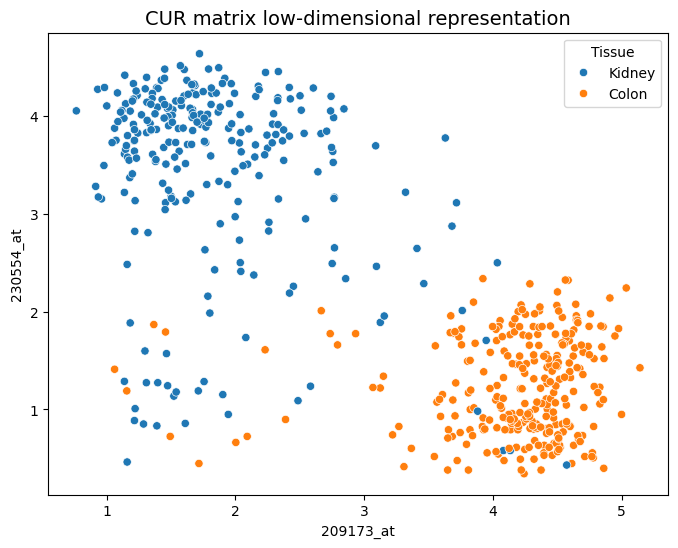

In [ ]:

fig, ax = plt.subplots(figsize=(8,6))
x1 = Xlog.iloc[:, ids[0]]
x2 = Xlog.iloc[:, ids[1]]
sns.scatterplot(x=x1, y=x2, hue=y, ax=ax)
plt.title('CUR matrix low-dimensional representation', fontsize=14)
plt.xlabel(x1.name)
plt.ylabel(x2.name)

plt.show()

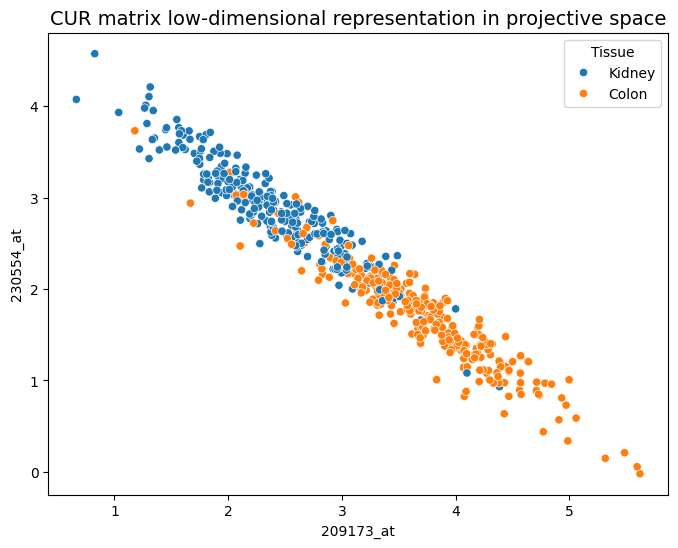

In [ ]:
X_proj = C@np.linalg.pinv(C)@Xlog
fig, ax = plt.subplots(figsize=(8,6))
x1 = X_proj.iloc[:, ids[0]]
x2 = X_proj.iloc[:, ids[1]]
sns.scatterplot(x=np.array(x1), y=np.array(x2), hue=y, ax=ax)
plt.title('CUR matrix low-dimensional representation in projective space', fontsize=14)
plt.xlabel(x1.name)
plt.ylabel(x2.name)

plt.show()

# K-means Clustering

In [ ]:
from sklearn.cluster import KMeans
k_value=range(3,11)

#### Performing K-means clustering from the result of CUR Reduction into 2 columns

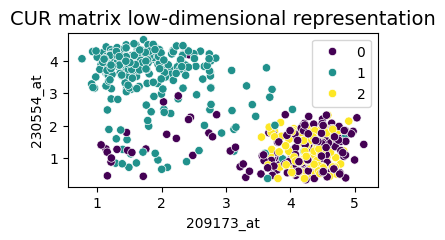

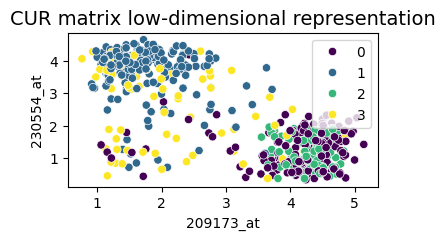

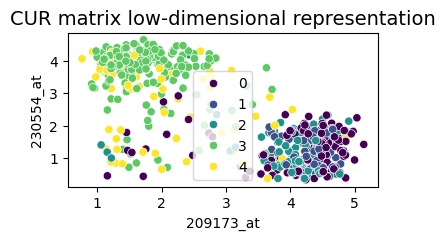

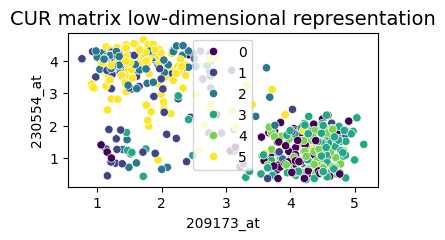

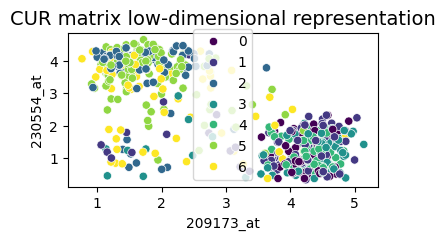

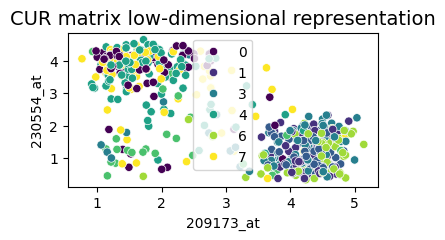

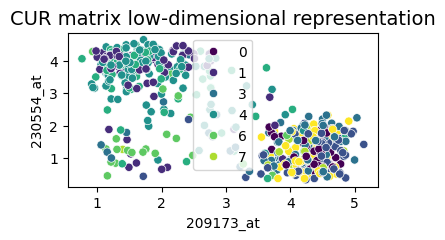

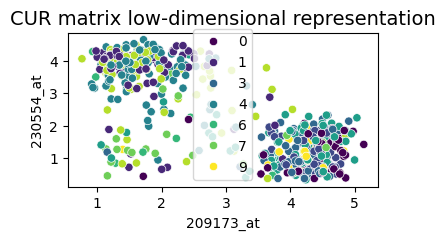

In [ ]:
cur = CUR(2, 0.5, truncated=False)
C,U,R = cur.run_CUR(Xlog)
ids = np.argsort(cur.pi_col)[::-1][:2]

for i in k_value:
  k_means=KMeans(n_clusters=i,random_state=42)
  cluster=k_means.fit_predict(C)
  fig, ax = plt.subplots(figsize=(4,2))
  x1 = Xlog.iloc[:, ids[0]]
  x2 = Xlog.iloc[:, ids[1]]
  sns.scatterplot(x=x1, y=x2, ax=ax,hue=cluster, palette='viridis')
  plt.title('CUR matrix low-dimensional representation', fontsize=14)
  plt.xlabel(x1.name)
  plt.ylabel(x2.name)

plt.show()

### Finding Optimal K of CUR using Silhoutte Score and Elbow Method

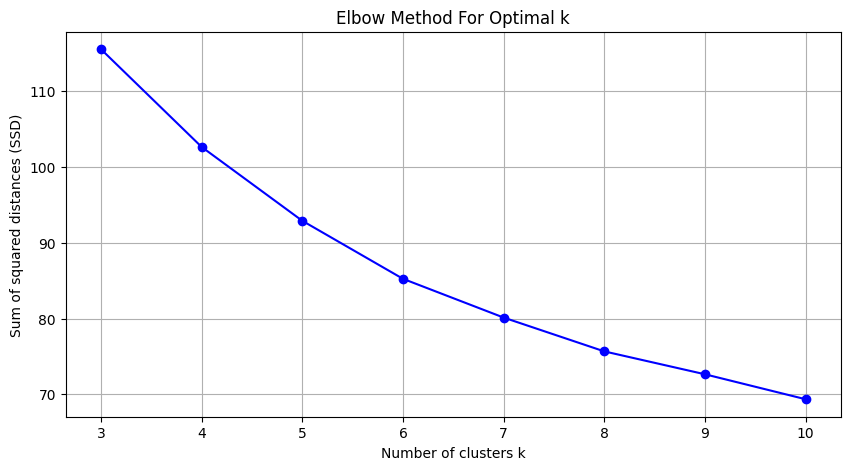

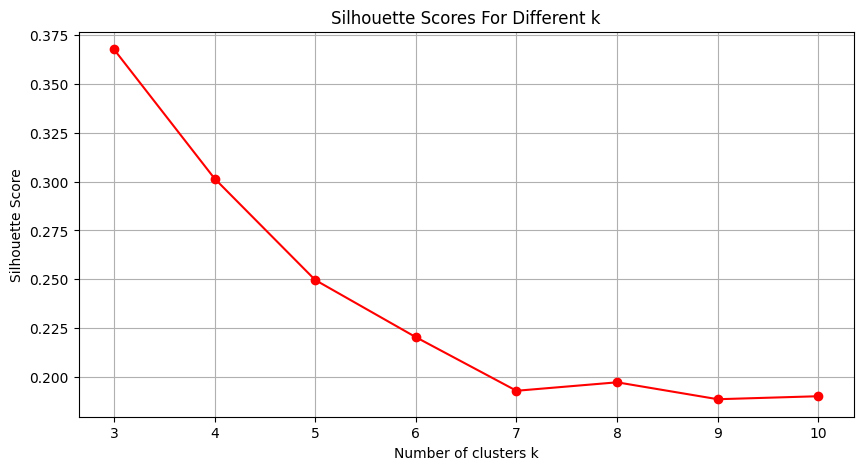

Silhouette Score for k=3: 0.3679
Silhouette Score for k=4: 0.3016
Silhouette Score for k=5: 0.2496
Silhouette Score for k=6: 0.2203
Silhouette Score for k=7: 0.1929
Silhouette Score for k=8: 0.1972
Silhouette Score for k=9: 0.1885
Silhouette Score for k=10: 0.1901


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming df is your DataFrame fully prepared for clustering
df = C  # Let's assume this DataFrame is ready and preprocessed

# Variables to store results
ssd = []  # Sum of squared distances
silhouette_scores = []

# Range of k to try
k_range = range(3, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    ssd.append(kmeans.inertia_)  # Inertia: Sum of squared distances of samples to their closest cluster center

    # Compute the silhouette score, only if there are more than 1 cluster (silhouette score requires more than one cluster)
    if k > 1:
        sil_score = silhouette_score(df, kmeans.labels_)
        silhouette_scores.append(sil_score)
    else:
        silhouette_scores.append(None)

# Plotting the Elbow Method graph for SSD
plt.figure(figsize=(10, 5))
plt.plot(k_range, ssd, 'bo-')
plt.xlabel('Number of clusters k')
plt.ylabel('Sum of squared distances (SSD)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

# Plotting the Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, 'ro-')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores For Different k')
plt.grid(True)
plt.show()

# Displaying the silhouette scores for review
for k, score in zip(k_range, silhouette_scores):
    print(f"Silhouette Score for k={k}: {score:.4f}")

#### Performing K-means clustering from the result of SVD Reduction into 2 columns

Decomposed Dataset Shape: (546, 2)
   Feature_0  Feature_1
0 -26.214115  -2.837069
1 -10.115635  -1.812037
2 -22.333239   0.567974
3 -19.474052   4.008687
4 -18.578161   4.606785
5 -23.081575   1.994824
6 -21.344206   5.297446


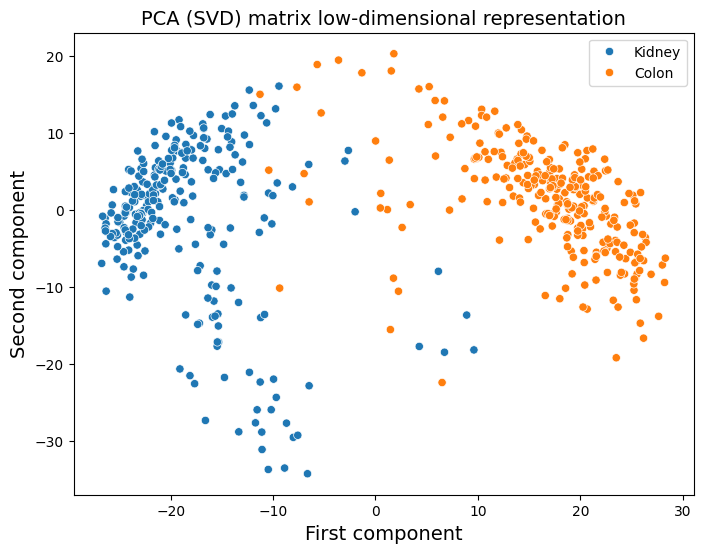

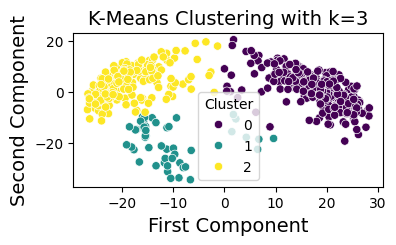

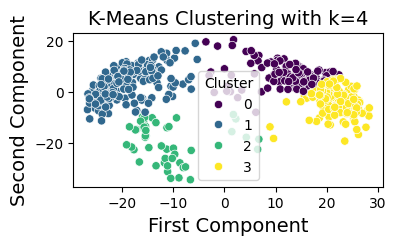

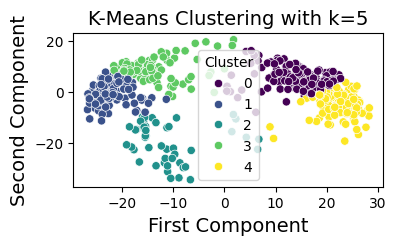

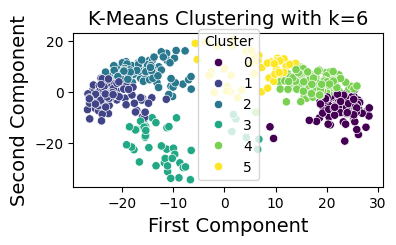

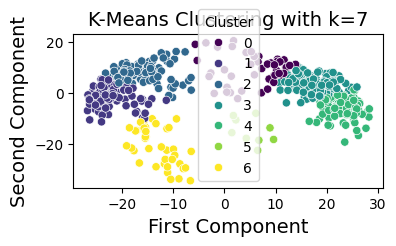

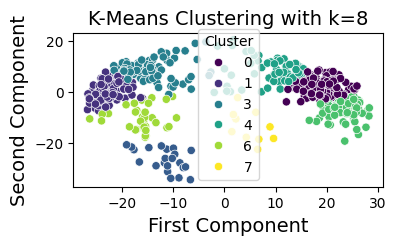

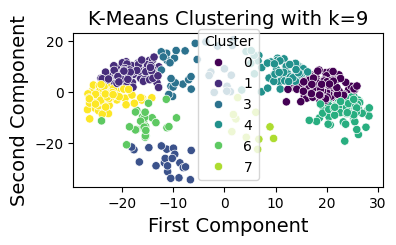

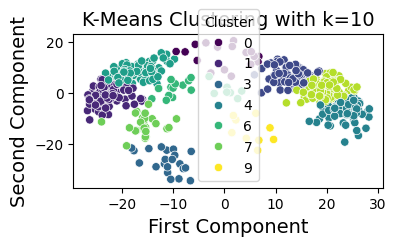

In [ ]:
Xlog_centered = Xlog - Xlog.mean(0)
U, Sigma, V = np.linalg.svd(Xlog_centered)
X_svd = (U @ np.diag(Sigma))[:, :2]
print(f"Decomposed Dataset Shape: {X_svd.shape}")
reduced_df = pd.DataFrame(X_svd, columns=[f"Feature_{i}" for i in range(X_svd.shape[1])])
print(reduced_df.head(7))
fig, ax = plt.subplots(figsize=(8,6))

sns.scatterplot(x=X_svd[:, 0], y=X_svd[:, 1], hue=y, ax=ax)
plt.title('PCA (SVD) matrix low-dimensional representation', fontsize=14)
plt.xlabel('First component', fontsize=14)
plt.ylabel('Second component', fontsize=14)
ax.legend()

plt.show()

for i in k_value:
    k_means=KMeans(n_clusters=i,random_state=42)
    clusters = k_means.fit_predict(X_svd)
    fig, ax = plt.subplots(figsize=(4, 2))
    sns.scatterplot(x=X_svd[:, 0], y=X_svd[:, 1], hue=clusters, palette='viridis', ax=ax)
    plt.title(f'K-Means Clustering with k={i}', fontsize=14)
    plt.xlabel('First Component', fontsize=14)
    plt.ylabel('Second Component', fontsize=14)
    ax.legend(title='Cluster')
    plt.show()

### Finding Optimal K of SVD using Silhoutte Score and Elbow Method

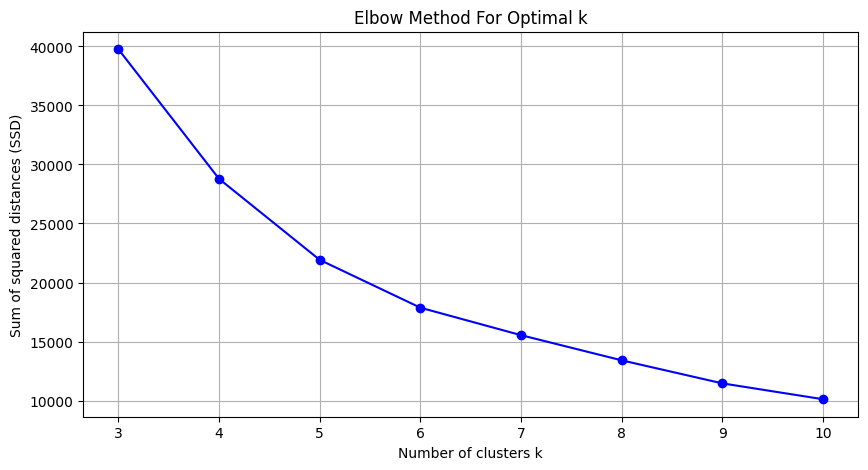

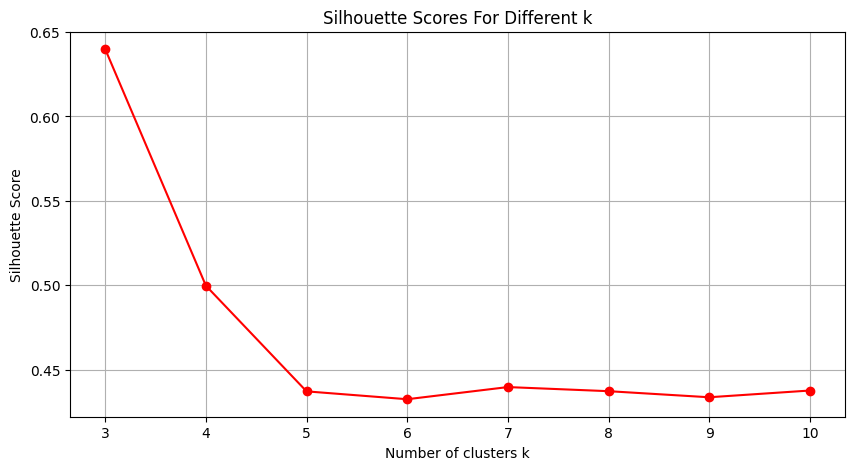

Silhouette Score for k=3: 0.6398
Silhouette Score for k=4: 0.4997
Silhouette Score for k=5: 0.4371
Silhouette Score for k=6: 0.4325
Silhouette Score for k=7: 0.4397
Silhouette Score for k=8: 0.4372
Silhouette Score for k=9: 0.4336
Silhouette Score for k=10: 0.4376


In [ ]:

# Assuming df is your DataFrame fully prepared for clustering
df = X_svd  # Let's assume this DataFrame is ready and preprocessed

# Variables to store results
ssd = []  # Sum of squared distances
silhouette_scores = []

# Range of k to try
k_range = range(3, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    ssd.append(kmeans.inertia_)  # Inertia: Sum of squared distances of samples to their closest cluster center

    # Compute the silhouette score, only if there are more than 1 cluster (silhouette score requires more than one cluster)
    if k > 1:
        sil_score = silhouette_score(df, kmeans.labels_)
        silhouette_scores.append(sil_score)
    else:
        silhouette_scores.append(None)

# Plotting the Elbow Method graph for SSD
plt.figure(figsize=(10, 5))
plt.plot(k_range, ssd, 'bo-')
plt.xlabel('Number of clusters k')
plt.ylabel('Sum of squared distances (SSD)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

# Plotting the Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, 'ro-')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores For Different k')
plt.grid(True)
plt.show()

# Displaying the silhouette scores for review
for k, score in zip(k_range, silhouette_scores):
    print(f"Silhouette Score for k={k}: {score:.4f}")
